#Integrantes
Gabriel Alves Reis - 2020006507

Samuel Brísio Jesus - 2020085547

Raphaela Maria Costa e Silva - 2020006973


In [17]:
! pip install numba

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import math

In [19]:
@jit(nopython=True) 
def calcEnergia(viz, s, i):
    numVizInfec = 0
    
    if(s[viz[i,0]] == 2):
       numVizInfec += 1
    if(s[viz[i,1]] == 2):
       numVizInfec += 1
    if(s[viz[i,2]] == 2):
       numVizInfec += 1
    if(s[viz[i,3]]  == 2):
       numVizInfec += 1

    return numVizInfec

@jit(nopython=True) 
def vizinhos(N):
    L=int(np.sqrt(N))
    viz = np.zeros((N,4),dtype=np.int16)
    for k in range(N):
        viz[k,0]=k+1
        if (k+1) % L == 0: viz[k,0] = k+1-L
        viz[k,1] = k+L
        if k > (N-L-1): viz[k,1] = k+L-N
        viz[k,2] = k-1
        if (k % L == 0): viz[k,2] = k+L-1
        viz[k,3] = k-L
        if k < L: viz[k,3] = k+N-L
    return viz

In [20]:
#@jit(nopython=True) 
def ising(sistema, pAdoecer, pRecuperar, viz, plotar):
    numIter = 0
    N = sistema.shape[0]
    qtdRecuperados = 0
    qtdNormais = N-1
    qtdDoentes = 1
    arrayRecuperados = [qtdRecuperados]
    arrayNormais = [qtdNormais]
    arrayDoentes = [qtdDoentes]
    
    while(2 in sistema):
        copySistema = np.copy(sistema)
        for i in range(N):
            de = calcEnergia(viz, copySistema,i) 

            podeAdoecer = False
            for _ in range(de):
                if(np.random.random() < pAdoecer):
                    podeAdoecer = True

            if (podeAdoecer and copySistema[i] == 0):
                qtdDoentes +=1
                qtdNormais -= 1
                sistema[i] = 2
            if (np.random.random() < pRecuperar and copySistema[i] == 2):
                sistema[i] = 1
                qtdDoentes -=1
                qtdRecuperados+=1
        
        
        if(numIter in plotar):
            listaX = []
            listaY = []
            for i in range(0, int(math.sqrt(N))):
                for j in range(0, int(math.sqrt(N))):
                    listaX = listaX + [i]
                    listaY = listaY + [j]
            status = []
            for i in range(0, N):
                status = status + [sistema[i]]

            plt.scatter(listaX, listaY, s=100, c=status, cmap='inferno')
            plt.show()

        numIter += 1
        arrayRecuperados = arrayRecuperados + [qtdRecuperados]
        arrayNormais = arrayNormais + [qtdNormais]
        arrayDoentes = arrayDoentes + [qtdDoentes]
        '''
        for i in range(0, int(math.sqrt(N))) :
            for j in range(0, int(math.sqrt(N))) :
                print(int(sistema[iter]), " " , end="")
                iter += 1
            print('')
        print("---------------------------------------------------------------------------")
        '''
    return numIter, arrayRecuperados, arrayNormais, arrayDoentes
  

In [21]:
def monteCarlo(L, pAdoecer, pRecuperar, plotar, seed):
    N = L**2
    iter = 0
    sistema = np.zeros(N)
    np.random.seed(seed)
    vitima0 = np.random.randint(0,N-1)
    sistema[vitima0] = 2
    viz = vizinhos(N)

    '''
    for i in range(0, int(math.sqrt(N))) :
        for j in range(0, int(math.sqrt(N))) :
            print(int(sistema[iter]), " " , end="")
            iter += 1
        print('')
    print("---------------------------------------------------------------------------")
    ''' 
    numIter, recup, normal, doentes = ising(sistema, pAdoecer, pRecuperar, viz, plotar)
    lista = list(range(0,numIter+1))

    return lista, recup, normal, doentes


In [41]:
a = np.array([1,2,3,4,5,6,7,8,9])
a[:4]

array([1, 2, 3, 4])

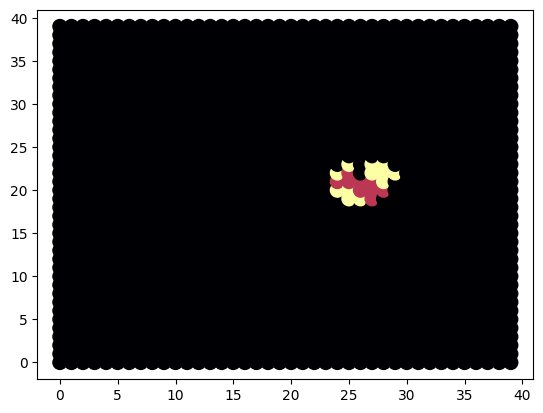

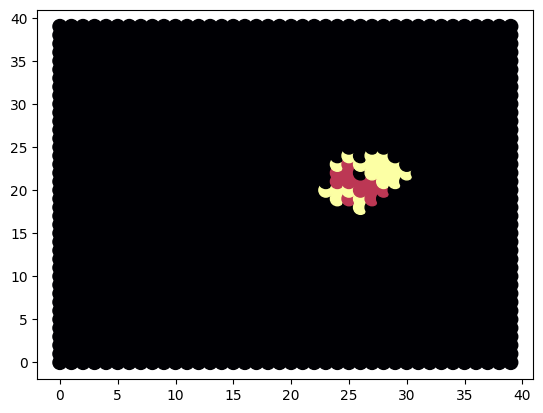

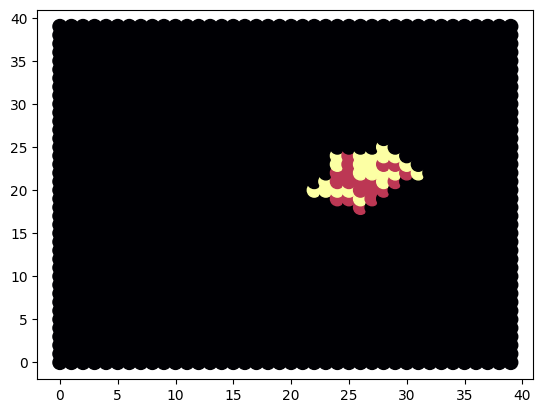

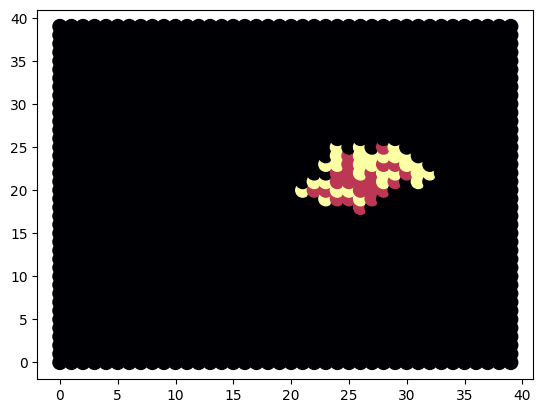

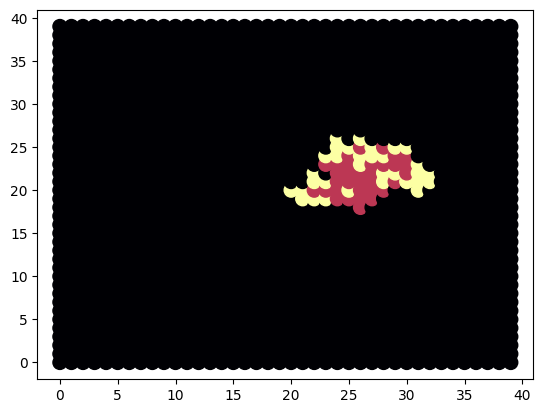

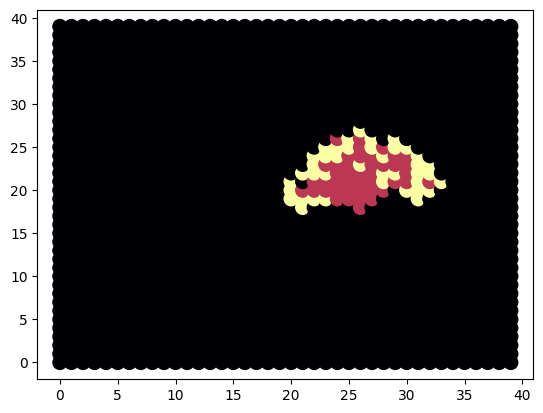

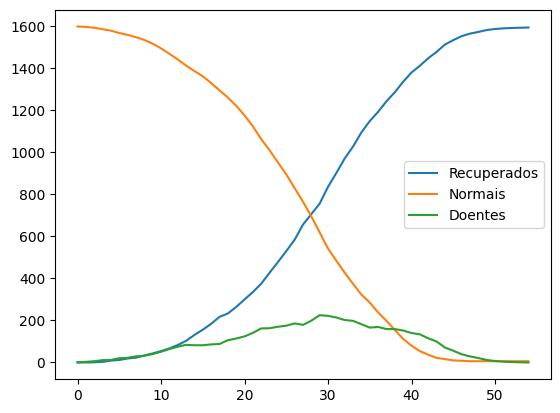

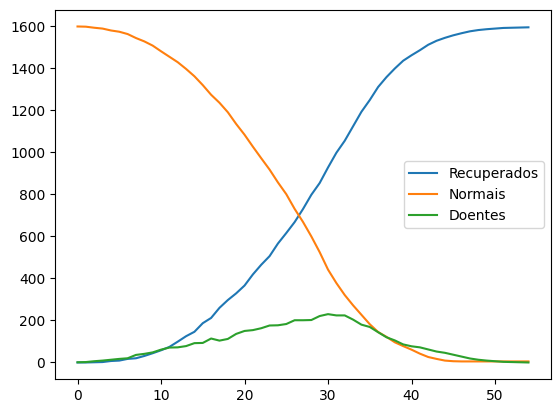

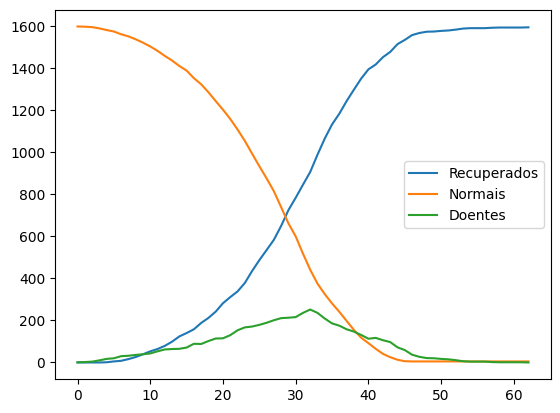

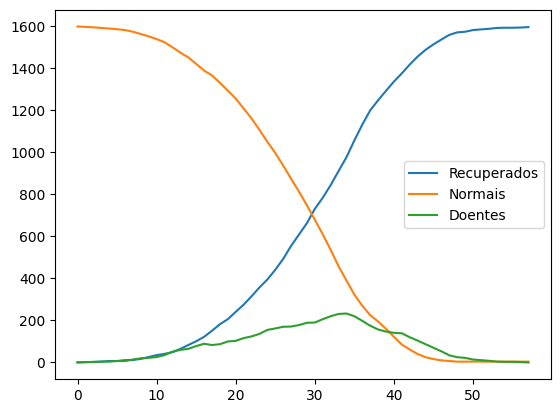

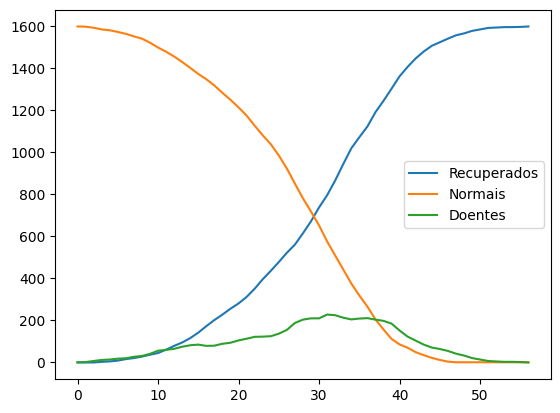

(55,) (55,)
55


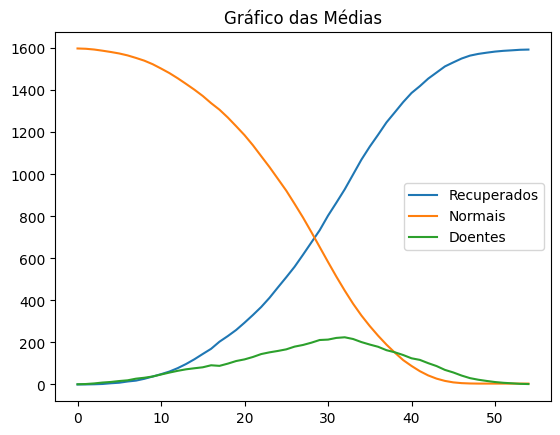

In [44]:
def ModeloSIR(L, probInfectar, probRecuperar, plot=[3,4,5,6,7,8]):
    seeds = [1,2,3,4,5]


    lista, recp, normal, doentes = monteCarlo(L, probInfectar, probRecuperar, plot, seeds[0])
    plt.plot(lista, recp, label='Recuperados')
    plt.plot(lista, normal, label='Normais')
    plt.plot(lista, doentes, label='Doentes')
    plt.legend()
    plt.show()

    recpMedias = [recp]
    normalMedias = [normal]
    doentesMedias = [doentes]
    listaMedia = np.arange(len(lista))

    for seed in seeds[1:]:
        lista, recp, normal, doentes = monteCarlo(L, probInfectar, probRecuperar, [], seed)
        plt.plot(lista, recp, label='Recuperados')
        plt.plot(lista, normal, label='Normais')
        plt.plot(lista, doentes, label='Doentes')
        plt.legend()
        plt.show()

        listaMedia = np.arange(len(lista)) if len(lista) < listaMedia.size else listaMedia
    
        recpMedias.append(recp)
        normalMedias.append(normal)
        doentesMedias.append(doentes)
    
    recpMedia = np.zeros(listaMedia.size)
    normalMedia = np.zeros(listaMedia.size)
    doentesMedia = np.zeros(listaMedia.size)

    for i in range(5):
        recpMedia += np.asarray(recpMedias[i][ :listaMedia.size])
        normalMedia += np.asarray(normalMedias[i][ :listaMedia.size])
        doentesMedia += np.asarray(doentesMedias[i][ :listaMedia.size])
    
    recpMedia /= 5
    normalMedia /= 5
    doentesMedia /= 5

    
    plt.plot(listaMedia, recpMedia, label='Recuperados')
    plt.plot(listaMedia, normalMedia, label='Normais')
    plt.plot(listaMedia, doentesMedia, label='Doentes')
    plt.legend()
    plt.title("Gráfico das Médias")
    plt.show()

ModeloSIR(40, 0.5, 0.3)